In [42]:
#导入数据
from sklearn import datasets
iris_dataset = datasets.load_iris()
X = iris_dataset.data
y = iris_dataset.target

In [43]:
#构建、评估模型
from sklearn.tree import DecisionTreeClassifier
decision_tree_clf = DecisionTreeClassifier()
from sklearn.model_selection import cross_val_score
scores = cross_val_score(decision_tree_clf,X,y,scoring = 'accuracy')
import numpy as np
print('the average score is {0:.1f}%'.format(np.mean(scores)*100))

the average score is 96.7%


In [44]:
#结果可视化：graphviz
from sklearn import tree
decision_tree_clf.fit(X,y)
with open('iris.dot','w') as f:
    f = tree.export_graphviz(decision_tree_clf,f)
#用window命令窗口，转到iris.dot文件所在文件夹，输入命令：
#dot -Tpng iris.dot -o iris.png
#支持png、gif、pdf、jpeg、bmp、svg、ps多种格式

In [45]:
#结果可视化：pydotplus
import pydotplus
dot_data = tree.export_graphviz(decision_tree_clf,out_file = None)
graph = pydotplus.graph_from_dot_data(dot_data)#直接用dot数据生成图片
graph.write_pdf('iris_pydotplus.pdf')
graph.write_png('iris_pydotplus.png')
graph_from_dot_file = pydotplus.graph_from_dot_file('iris.dot')#用tree先生成dot文件，再用dot文件生成图片
graph_from_dot_file.write_jpeg('iris_pydotplus.jpeg')

True

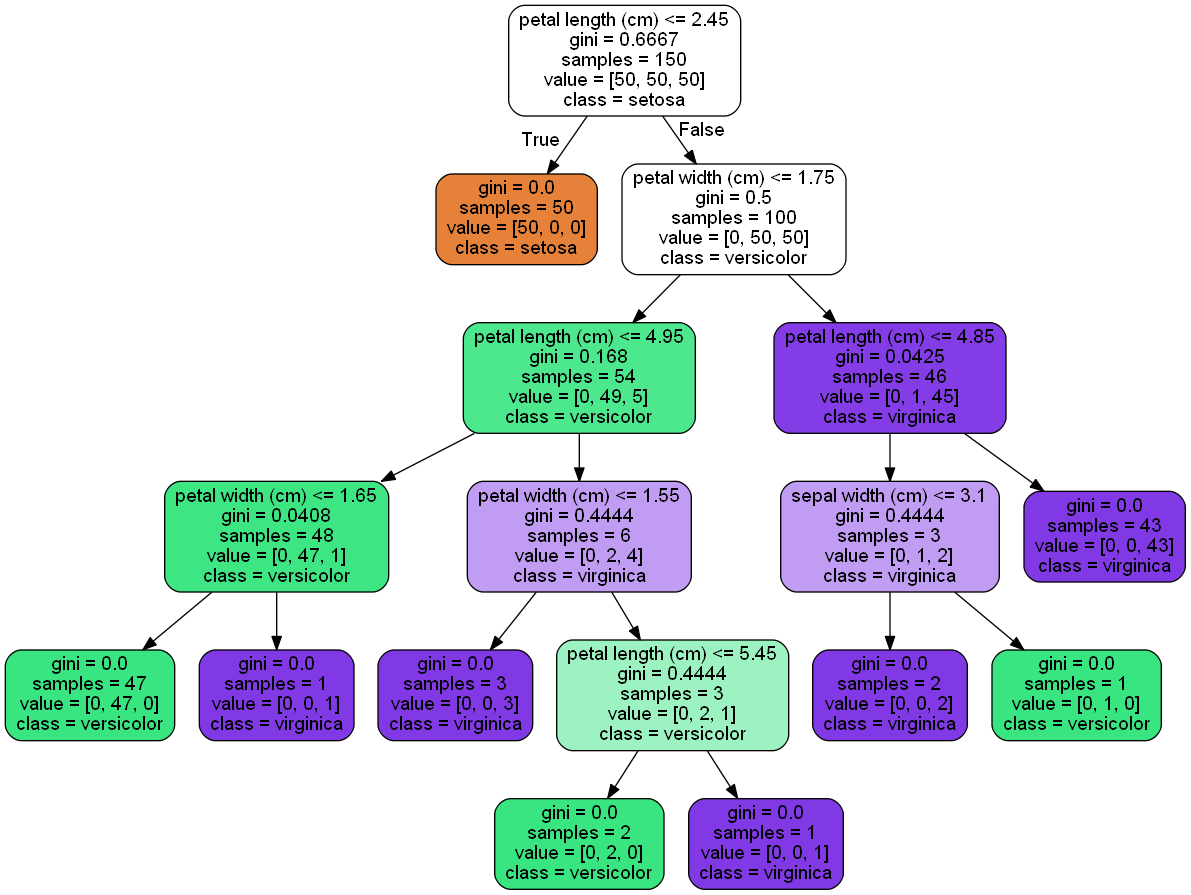

In [46]:
#对决策树进行美化
dot_data = tree.export_graphviz(decision_tree_clf,out_file = None,class_names = iris_dataset.target_names,
                                feature_names = iris_dataset.feature_names,rounded = True,filled = True
                               )
graph = pydotplus.graph_from_dot_data(dot_data)
#在jupyter notebook中显示图片
from IPython.display import Image
Image(graph.create_png())